In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e26/sample_submission.csv
/kaggle/input/playground-series-s3e26/train.csv
/kaggle/input/playground-series-s3e26/test.csv
/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv


In [2]:
train_ = pd.read_csv('/kaggle/input/cirrhosis-prediction-dataset/cirrhosis.csv')
train_.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [3]:
train_df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')

<Axes: >

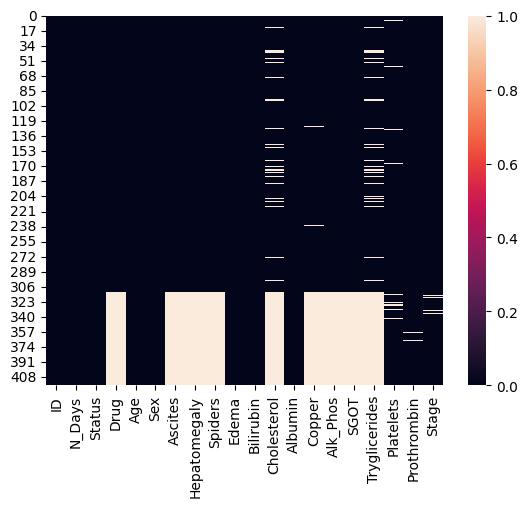

In [4]:
sns.heatmap(train_.isnull())

In [5]:
t = train_.dropna() # removiong all NaNs
t = t.rename(columns={'ID': 'id'}) # since it has ID -> id for this df

In [6]:
train_df = pd.concat([train_df,t],ignore_index=True)

In [7]:
train_df.isnull().sum()

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [8]:
to_dummies = train_df.select_dtypes(['object']).columns[:-1]

In [9]:
train_df['Status'].value_counts()

Status
C     5112
D     2776
CL     293
Name: count, dtype: int64

In [10]:
train_df.drop(['id','Status'],axis=1).nunique()

N_Days           461
Drug               2
Age              391
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin        111
Cholesterol      226
Albumin          160
Copper           171
Alk_Phos         364
SGOT             206
Tryglicerides    154
Platelets        227
Prothrombin       49
Stage              4
dtype: int64

To convert one-hot-encoding

In [11]:
train_df = pd.get_dummies(data=train_df, columns=to_dummies,drop_first=True)

<Axes: >

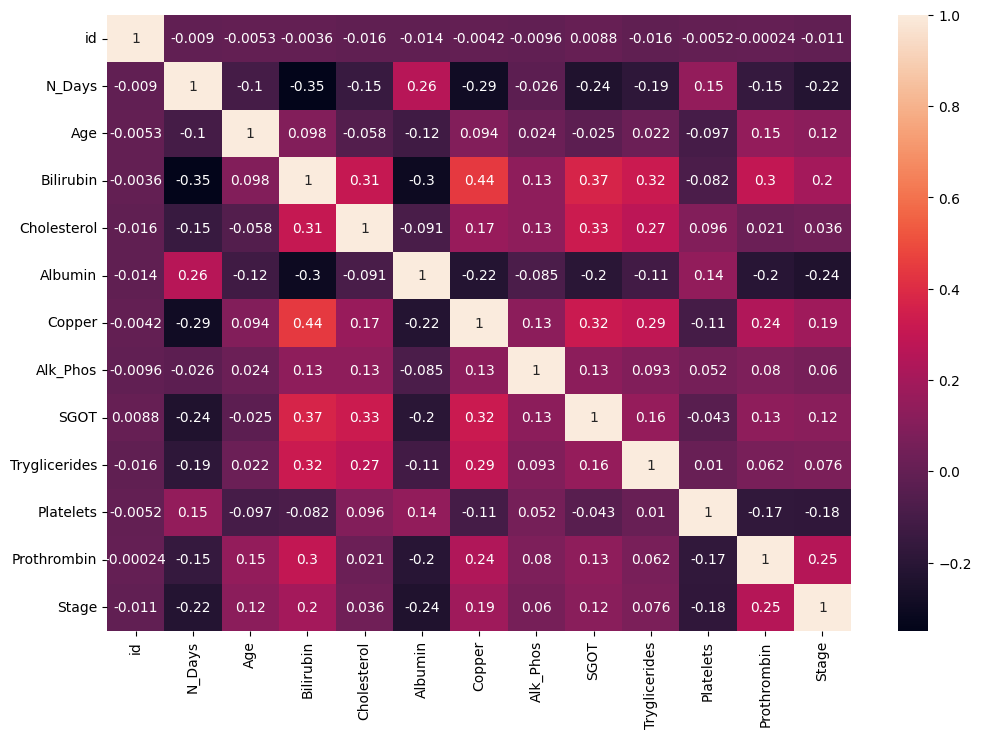

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(train_df.select_dtypes(['int64','float64']).corr(),annot=True)

In [13]:
train_df.drop(['id','Status'],axis=1).nunique()

N_Days            461
Age               391
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Drug_Placebo        2
Sex_M               2
Ascites_Y           2
Hepatomegaly_Y      2
Spiders_Y           2
Edema_S             2
Edema_Y             2
dtype: int64

In [14]:
train_df = pd.get_dummies(data=train_df, columns=['Stage'],drop_first=True)

id is right-skewed.
N_Days is right-skewed.
Age is right-skewed.
Bilirubin is right-skewed.
Cholesterol is right-skewed.
Albumin is not right-skewed.
Copper is right-skewed.
Alk_Phos is right-skewed.
SGOT is right-skewed.
Tryglicerides is right-skewed.
Platelets is right-skewed.
Prothrombin is right-skewed.


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Drug_Placebo is not right-skewed.
Sex_M is right-skewed.


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Ascites_Y is right-skewed.
Hepatomegaly_Y is not right-skewed.


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Spiders_Y is right-skewed.
Edema_S is right-skewed.


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Edema_Y is right-skewed.
Stage_2.0 is right-skewed.


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Stage_3.0 is right-skewed.
Stage_4.0 is right-skewed.


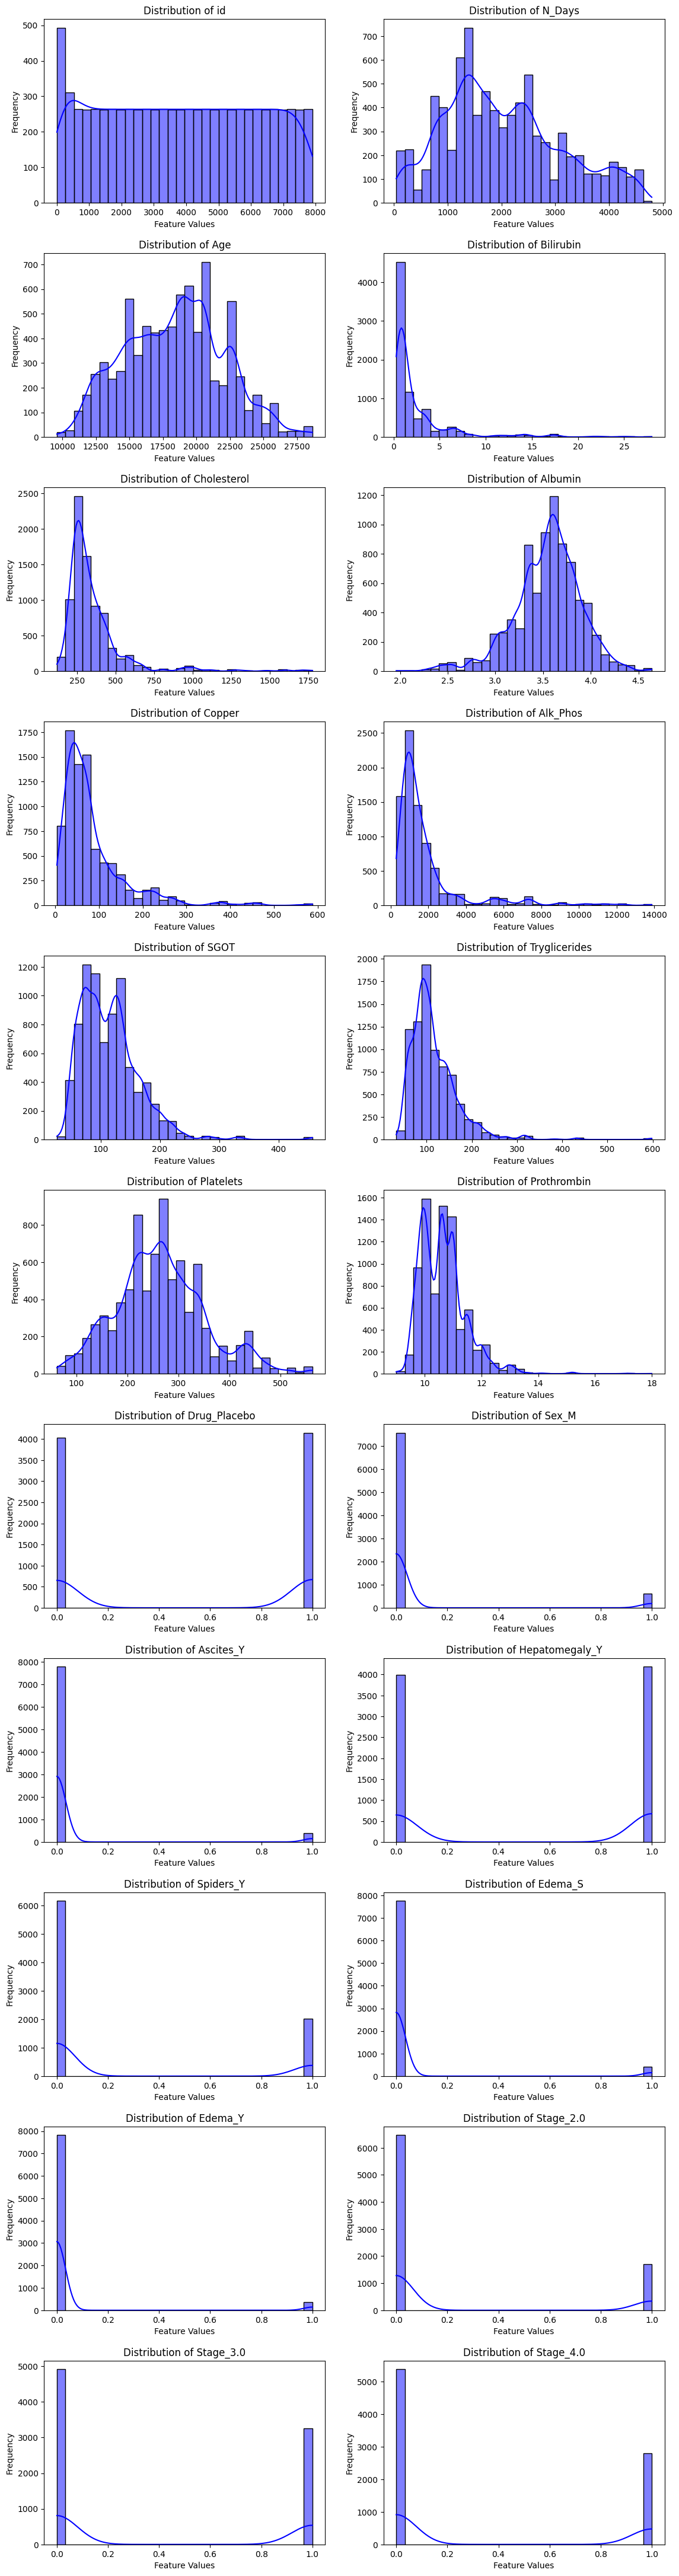

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_columns = [col for col in train_df.columns if col != 'Status']


num_features = len(feature_columns)
num_rows = (num_features + 1) // 2  #at least 2 rows
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 4 * num_rows))
fig.tight_layout(pad=4.0)

for i, feature_column in enumerate(feature_columns):
    row_index = i // num_cols
    col_index = i % num_cols
    feature_data = train_df[feature_column]
    sns.histplot(feature_data, kde=True, color='blue', bins=30, ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {feature_column}')
    axes[row_index, col_index].set_xlabel('Feature Values')
    axes[row_index, col_index].set_ylabel('Frequency')
    if feature_data.skew() > 0:
        print(f"{feature_column} is right-skewed.")
    else:
        print(f"{feature_column} is not right-skewed.")

plt.show()

Majority of them are right skewed, we can apply log transform

In [16]:
from sklearn.preprocessing import LabelEncoder # not needed
labels = train_df['Status']
label_encoder = LabelEncoder()

encoded_labels = label_encoder.fit_transform(labels)

label_mapping = {label: encoded_label for label, encoded_label in zip(labels, encoded_labels)}

print(label_mapping)

{'D': 2, 'C': 0, 'CL': 1}


In [17]:
train_df['Status']= train_df['Status'].apply(lambda x:label_mapping[x])

In [18]:
from sklearn.model_selection import train_test_split
X = train_df.drop(['id','Status'],axis=1)
y = train_df['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
X_train_log = np.log1p(X_train)
X_test_log = np.log1p(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs',multi_class='multinomial' ,max_iter=2000)
logmodel.fit(X_train_log,y_train)
predictions = logmodel.predict_proba(X_test_log)
from sklearn.metrics import log_loss
logloss = log_loss(y_test, predictions)
logloss

0.5106722226350567

Lets apply other models


In [21]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

# took these hyperparameters from 'https://www.kaggle.com/code/shadechen/eda-otuna-ensemble-lgb-xgb-cat#Build-Baseline-model-2.0'
lgb_params = {'n_estimators': 480,
 'max_depth': 31,
 'learning_rate': 0.01613205127311291,
 'reg_alpha': 0.002142894395647579,
 'reg_lambda': 0.30329181180045517,
 'min_child_weight': 3.4002669853355854,
 'min_child_samples': 1,
 'subsample': 0.6192997638546596,
 'subsample_freq': 3,
 'colsample_bytree': 0.2617851104198444,
 'num_leaves': 38,
 'objective': 'multiclass'}

lgbm_classifier = LGBMClassifier(**lgb_params, random_state=42,)

In [22]:
lgbm_classifier.fit(X_train_log,y_train)
predictions_lgbm = lgbm_classifier.predict_proba(X_test_log)
logloss = log_loss(y_test, predictions_lgbm)
logloss
#0.4165887983461585

0.4165887983461585

In [23]:
xgb_params = {'n_estimators': 397,
 'max_depth': 44,
 'min_child_weight': 4.8419409783368215,
 'learning_rate': 0.049792103525168455,
 'subsample': 0.7847543051746505,
 'gamma': 0.4377096783729759,
 'colsample_bytree': 0.22414960640035653,
 'colsample_bylevel': 0.8173336142032213,
 'colsample_bynode': 0.9468109886478254}

xgb_classifier = XGBClassifier(**xgb_params, 
                        random_state=42, 
                       )

In [24]:
xgb_classifier.fit(X_train_log,y_train)
predictions_xgb = xgb_classifier.predict_proba(X_test_log)
logloss = log_loss(y_test, predictions_xgb)
logloss
#43.27

0.41818829392759377

In [25]:
# from sklearn.ensemble import HistGradientBoostingClassifier
# hist_classifier = HistGradientBoostingClassifier(l2_regularization = 0.01,
#                                              early_stopping = False,
#                                              learning_rate = 0.015,
#                                              max_iter = 400,
#                                              max_depth = 5,
#                                              max_bins = 255,
#                                              min_samples_leaf = 15,
#                                              max_leaf_nodes = 10)

In [26]:
# hist_classifier.fit(X_train_log,y_train)
# predictions_hist = hist_classifier.predict_proba(X_test_log)
# logloss = log_loss(y_test, predictions_hist)
# logloss

We will include **lgbm, xgb** they provide better results

In [27]:
from sklearn.ensemble import VotingClassifier

In [28]:
model1 = xgb_classifier
model2 = lgbm_classifier

ensemble_model = VotingClassifier(estimators=[('model1', model1), ('model2', model2),
                                            # ('model3', model3),
                                             ], voting='soft',weights=[0.2,0.8])

In [29]:
ensemble_model.fit(X_train_log,y_train)
ensemble_predictions = ensemble_model.predict_proba(X_test_log)
logloss_ensemble = log_loss(y_test,ensemble_predictions)
logloss_ensemble

0.41604235093735437

In [30]:
# X_train

In [31]:
# import tensorflow as tf 
# from tensorflow import keras 
# from tensorflow.keras import layers 
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense,Dropout
# from tensorflow.keras.callbacks import EarlyStopping

In [32]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout

# model = Sequential()
# model.add(Input(shape=(19,)))

# model.add(BatchNormalization())

# model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.3))

# # Additional complexity in the first hidden layer
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))

# # Additional complexity in the second hidden layer
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))

# model.add(Dense(3, activation='softmax'))


In [33]:
# loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# optimizer = keras.optimizers.Adam(learning_rate=0.01)

In [34]:
# model.compile(
#     optimizer= optimizer,
#     loss=loss,
#     metrics=['accuracy'],
# )

In [35]:
# model.fit(x=X_train_log, 
#           y=y_train, 
#           epochs=10,
#           batch_size=64,
#           )

In [36]:
# losses = pd.DataFrame(model.history.history).plot()

In [37]:
# p = model.predict(X_test_log)

In [38]:
# logloss_nn = log_loss(y_test, p)
# logloss_nn

**For all the train dataset**

In [39]:
train_df_ = train_df.drop(['id','Status'],axis=1)

In [40]:
test_df = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
# test_df.isnull().sum() no null values
test_df_ = test_df.drop('id',axis=1) 

In [41]:
test_df_ = pd.get_dummies(data=test_df_, columns=to_dummies,drop_first=True)
test_df_ = pd.get_dummies(data=test_df_, columns=['Stage'],drop_first=True)

In [42]:
print('Shape of train',train_df_.shape)
print('Shape of test',test_df_.shape)

Shape of train (8181, 21)
Shape of test (5271, 21)


In [43]:
# Apply log-T
train_df_logt = np.log1p(train_df_)
test_df_logt = np.log1p(test_df_)

In [44]:
y_train_df_all = train_df['Status']

In [45]:
# applying to the model

ensemble_model.fit(train_df_logt, y_train_df_all)
ensemble_predictions = ensemble_model.predict_proba(test_df_logt)

In [46]:
ensemble_predictions_df = pd.DataFrame(ensemble_predictions)

In [47]:
ensemble_predictions_df

,0,1,2
0,0.426066,0.023891,0.550043
1,0.500169,0.263951,0.235880
2,0.044222,0.012412,0.943366
3,0.969003,0.003513,0.027483
4,0.813285,0.059512,0.127203
...,...,...,...
5266,0.865650,0.082325,0.052025
5267,0.966111,0.004090,0.029799
5268,0.931946,0.011981,0.056073
5269,0.974546,0.006083,0.019371


-------

In [48]:
ensemble_predictions_df = pd.DataFrame(ensemble_predictions_df)

In [49]:
submission = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
combined_df_ann = pd.concat([submission, ensemble_predictions_df], axis=1)

In [50]:
combined_df_ann = combined_df_ann.drop(['Status_C','Status_CL','Status_D'],axis=1)
combined_df_ann.columns=['id','Status_C','Status_CL','Status_D']
combined_df_ann.to_csv('submission.csv',index=False)

In [51]:
combined_df_ann

,id,Status_C,Status_CL,Status_D
0,7905,0.426066,0.023891,0.550043
1,7906,0.500169,0.263951,0.235880
2,7907,0.044222,0.012412,0.943366
3,7908,0.969003,0.003513,0.027483
4,7909,0.813285,0.059512,0.127203
...,...,...,...,...
5266,13171,0.865650,0.082325,0.052025
5267,13172,0.966111,0.004090,0.029799
5268,13173,0.931946,0.011981,0.056073
5269,13174,0.974546,0.006083,0.019371
